# load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# read data
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
data = pd.read_csv('/content/InBalanceAllData.csv') 
data.head(10)

,avg_caption_lenght,avg_comment_length,has_url_in_bio,has_profile_picture,has_highlight_reels,post_count,follower_count,following_count,engagement_page_rate,fake_followers_count,bio_length,avg_like_count,avg_comment_count,post_type,caption_length,hashtag_count,hashtag_rate,comment_count,like_count,view_count,label
0,708,56,0,1,1,15986,723120,4,1.34,192,83,9660,284,1,2126,9,55.5556,58,3729,0,1
1,708,56,0,1,1,15986,723120,4,1.34,192,83,9660,284,1,2042,7,57.1429,30,3298,0,1
2,708,56,0,1,1,15986,723120,4,1.34,192,83,9660,284,1,416,12,50.0000,5,1626,0,1
3,708,56,0,1,1,15986,723120,4,1.34,192,83,9660,284,2,553,8,37.5000,18,2842,27314,1
4,708,56,0,1,1,15986,723120,4,1.34,192,83,9660,284,3,814,8,25.0000,48,5476,0,1
5,708,56,0,1,1,15986,723120,4,1.34,192,83,9660,284,2,458,9,33.3333,3,1425,13479,1
6,708,56,0,1,1,15986,723120,4,1.34,192,83,9660,284,1,1021,11,36.3636,526,8537,0,1
7,708,56,0,1,1,15986,723120,4,1.34,192,83,9660,284,1,1003,10,40.0000,99,5995,0,1
8,708,56,0,1,1,15986,723120,4,1.34,192,83,9660,284,2,558,10,40.0000,37,1780,20328,1
9,708,56,0,1,1,15986,723120,4,1.34,192,83,9660,284,2,1726,8,37.5000,742,12863,148197,1


In [ ]:
# convert data to array structure
# seperate data and label 
import numpy as np
x = data [['avg_caption_lenght', 'avg_comment_length',	'has_url_in_bio',	'has_profile_picture',	'has_highlight_reels',	'post_count',
           'follower_count',	'following_count',	'engagement_page_rate',	'fake_followers_count',	'bio_length',	'avg_like_count',	'avg_comment_count',
           	'post_type',	'caption_length',	'hashtag_count',	'hashtag_rate',	'comment_count',	'like_count',	'view_count'] ]
y = data['label']
data = np.array(x)
label = np.array(y)
print("data shape: ",data.shape, '\nlabel shape: ', data.shape, '\n sample: \n', data[1] )

data shape:  (1990, 20) 
label shape:  (1990, 20) 
 sample: 
 [7.08000e+02 5.60000e+01 0.00000e+00 1.00000e+00 1.00000e+00 1.59860e+04
 7.23120e+05 4.00000e+00 1.34000e+00 1.92000e+02 8.30000e+01 9.66000e+03
 2.84000e+02 1.00000e+00 2.04200e+03 7.00000e+00 5.71429e+01 3.00000e+01
 3.29800e+03 0.00000e+00]


In [ ]:
# normalize data 
from sklearn import preprocessing

def norm (norm_name , input_Data):
  out_norm_data = []
  if (norm_name == 'variance_scale'):
      out_norm_data = preprocessing.scale(input_Data,axis=0)
  elif (norm_name == 'min_max'):
      min_max_scaler = preprocessing.MinMaxScaler()
      out_norm_data = min_max_scaler.fit_transform(input_Data)

  return out_norm_data

norm_name = 'min_max'
data = norm(norm_name, data)
print( 'sample after normalization: \n\n', data[1])

sample after normalization: 

 [1.00000000e+00 5.33333333e-01 0.00000000e+00 0.00000000e+00
 1.00000000e+00 4.54643127e-01 4.59606021e-01 2.90570972e-04
 5.56603774e-01 3.01801802e-01 5.57046980e-01 2.89082445e-01
 2.59191176e-01 0.00000000e+00 9.28181818e-01 2.12121212e-01
 5.71429000e-01 3.68640944e-03 2.22100819e-02 0.00000000e+00]


In [ ]:
xx =data [1500:-1]
yy =label [1500:-1]
data =  data[:1500]
label = label[:1500]

- example of data minimizing

     formula: 
         min_max:       x = (x - min(x)) / (max(x) - min(x))
         mean_variance  x = (x-mean) / variance

In [ ]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])


min_max_scaler = preprocessing.MinMaxScaler( )
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_meanvariance = preprocessing.scale(X_train, axis=0)
print("X_train_minmax: \n", X_train_minmax, "\nX_train_meanvariance: \n", X_train_meanvariance)

X_train_minmax: 
 [[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]] 
X_train_meanvariance: 
 [[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]



Next, we should split the training and testing data according to our dataset (0.8 and 0.2 in this case).

## svm


  Fold:  1
Label count train:    Counter({1: 1114, 0: 171}) 	Label count test :  Counter({0: 518, 1: 186})
[LibSVM]confution matrix:
[[448   0]
 [ 70 186]]
Evaluation criteria:
	Accuracy:	 train:    0.982101167315175 	 test:  0.9005681818181818 
	Precision:	 train:    0.9327485380116959 	 test:  0.9324324324324325 
	Recall: 	 train:    0.9898856640281443 	 test:  0.86328125 
	F1_measure: 	 train:    0.9588410027448615 	 test:  0.884582595580038
coeficient: 
 [ 0.0284967   0.28569768  0.3558434   0.         -0.09352763  0.18413252
  0.08110599 -0.11837091 -0.07964462  0.38799352 -0.17682567  0.04603313
  0.07014572  0.          0.         -0.2279736  -0.00584548  0.
  0.01680575 -0.0094989 ]


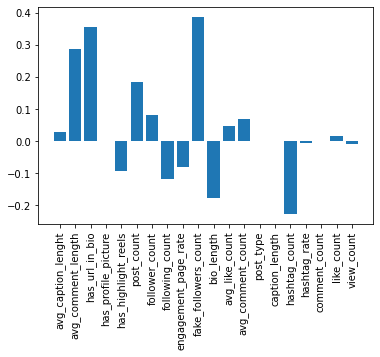


  Fold:  2
Label count train:    Counter({1: 1114, 0: 171}) 	Label count test :  Counter({0: 518, 1: 186})
[LibSVM]confution matrix:
[[445   0]
 [ 73 186]]
Evaluation criteria:
	Accuracy:	 train:    0.9844357976653697 	 test:  0.8963068181818182 
	Precision:	 train:    0.9415204678362573 	 test:  0.9295366795366795 
	Recall: 	 train:    0.9911816578483246 	 test:  0.859073359073359 
	F1_measure: 	 train:    0.9644957008023696 	 test:  0.8800751397202096
coeficient: 
 [ 0.02776601  0.30907959  0.20166895  0.         -0.09133558  0.16440404
  0.05187861 -0.09133558 -0.07964462  0.32953876 -0.16732677  0.04237971
  0.04457176  0.          0.         -0.15344377  0.00511479  0.00146137
  0.01096027 -0.01242164]


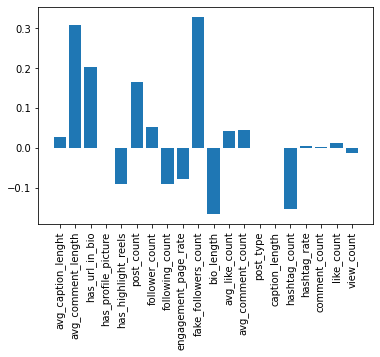


  Fold:  3
Label count train:    Counter({1: 1114, 0: 172}) 	Label count test :  Counter({0: 517, 1: 186})
[LibSVM]confution matrix:
[[444   0]
 [ 73 186]]
Evaluation criteria:
	Accuracy:	 train:    0.9844479004665629 	 test:  0.8961593172119487 
	Precision:	 train:    0.9418604651162791 	 test:  0.9294003868471954 
	Recall: 	 train:    0.9911816578483246 	 test:  0.859073359073359 
	F1_measure: 	 train:    0.9646874038926234 	 test:  0.8799962585789616
coeficient: 
 [-0.0226628   0.26902935  0.19884778  0.         -0.09649966  0.07822321
  0.04386348 -0.11550716 -0.15644641  0.26902935 -0.15790853  0.02851126
  0.0226628   0.          0.         -0.27268464 -0.00731058  0.
  0.00073106 -0.02558703]


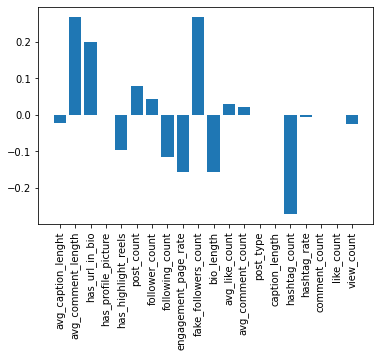


  Fold:  4
Label count train:    Counter({1: 1114, 0: 172}) 	Label count test :  Counter({0: 517, 1: 186})
[LibSVM]confution matrix:
[[515   0]
 [  2 186]]
Evaluation criteria:
	Accuracy:	 train:    0.9813374805598756 	 test:  0.9971550497866287 
	Precision:	 train:    0.9302325581395349 	 test:  0.9980657640232109 
	Recall: 	 train:    0.9894551845342707 	 test:  0.9946808510638299 
	F1_measure: 	 train:    0.9571714031971581 	 test:  0.9963572109604941
coeficient: 
 [0.37210853 0.67184231 0.40354402 0.         0.         0.16156382
 0.0731058  0.         0.11623822 0.7624935  0.25952559 0.04678771
 0.050443   0.         0.         0.         0.         0.
 0.         0.        ]


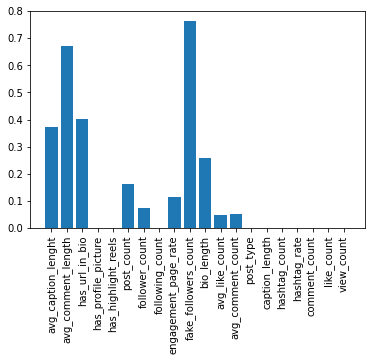


  Fold:  5
Label count train:    Counter({1: 1114, 0: 172}) 	Label count test :  Counter({0: 517, 1: 186})
[LibSVM]confution matrix:
[[516   0]
 [  1 186]]
Evaluation criteria:
	Accuracy:	 train:    0.9805598755832037 	 test:  0.9985775248933144 
	Precision:	 train:    0.9273255813953488 	 test:  0.9990328820116054 
	Recall: 	 train:    0.9890254609306409 	 test:  0.9973262032085561 
	F1_measure: 	 train:    0.9552668890104034 	 test:  0.9981754903207556
coeficient: 
 [0.40427508 0.74056176 0.58338429 0.         0.         0.30704436
 0.11185187 0.         0.23028327 0.84583411 0.26171877 0.07237474
 0.12281775 0.         0.         0.00438635 0.0087727  0.
 0.02851126 0.        ]


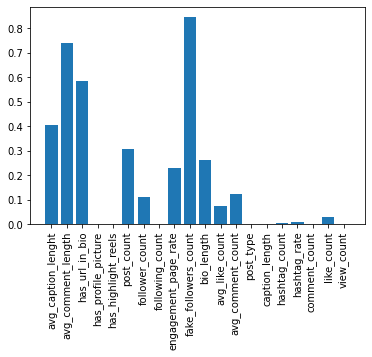


  Fold:  6
Label count train:    Counter({1: 1115, 0: 171}) 	Label count test :  Counter({0: 518, 1: 185})
[LibSVM]confution matrix:
[[513   0]
 [  5 185]]
Evaluation criteria:
	Accuracy:	 train:    0.9836702954898912 	 test:  0.9928876244665719 
	Precision:	 train:    0.9385964912280702 	 test:  0.9951737451737452 
	Recall: 	 train:    0.9907570422535211 	 test:  0.986842105263158 
	F1_measure: 	 train:    0.9626251261121743 	 test:  0.9909085030714516
coeficient: 
 [0.33671815 0.64042471 0.39393822 0.         0.         0.16505792
 0.07555985 0.         0.12544402 0.70644788 0.25455598 0.05208494
 0.04915058 0.         0.         0.         0.         0.
 0.00293436 0.        ]


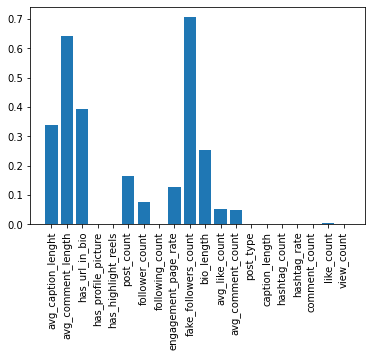


  Fold:  7
Label count train:    Counter({1: 1115, 0: 171}) 	Label count test :  Counter({0: 518, 1: 185})
[LibSVM]confution matrix:
[[449   0]
 [ 69 185]]
Evaluation criteria:
	Accuracy:	 train:    0.9821150855365475 	 test:  0.9018492176386913 
	Precision:	 train:    0.9327485380116959 	 test:  0.9333976833976834 
	Recall: 	 train:    0.9898945518453427 	 test:  0.8641732283464567 
	F1_measure: 	 train:    0.958845537889571 	 test:  0.8857349480463497
coeficient: 
 [ 0.03227799  0.2927027   0.36166023  0.         -0.0946332   0.17679537
  0.05942085 -0.11150579 -0.07262548  0.39173745 -0.14965251  0.0557529
  0.05868726  0.00220077  0.         -0.27876448  0.          0.00146718
  0.01320463 -0.01980695]


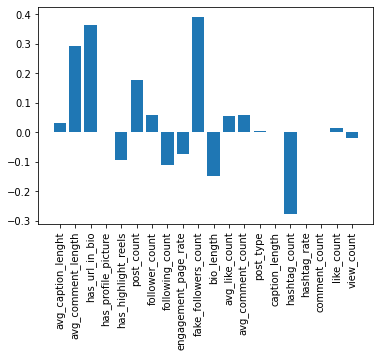


  Mean results: 
	Accuracy_mean:	 train:    0.9826668003738036 	 test:  0.940500533428165 
	Precision_mean:	 train:    0.9350046628198403 	 test:  0.9595770819175075 
	Recall_mean: 	 train:    0.9901973170412242 	 test:  0.917778622289817 
	F1_mean: 	 train:    0.9602761519498801 	 test:  0.9308328780397515
  Varance results:
	Accuracy_variance:	 train:    2.3565374442692236e-06 	 test:  0.0027224705515150284 
	Precision_variance:	 train:    3.238007405960003e-05 	 test:  0.0012567521415622182 
	Recall_variance: 	 train:    7.273246214190408e-07 	 test:  0.004957942134297985 
	F1_variance: 		 train:    1.3603317613431874e-05 	 test:  0.003628528025216117


In [ ]:
# svm (suport vector machine)
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score,  f1_score
from collections import Counter
import statistics
from mlxtend.evaluate import feature_importance_permutation


# from numpy.random import seed
# seed(3)

# kernel( poly, linear, rbf)

# K_fold = KFold(n_splits=10, shuffle=True, random_state=5,)
K_fold = StratifiedKFold(n_splits=7, shuffle=True, random_state=5,)

i = 1
res = {"accuracy":{"train":[], "test":[]}, 
       "precision":{"train":[], "test":[]}, 
       "recall":{"train":[], "test":[]}, 
       "F1":{"train":[], "test":[]}}

for train_idx, test_idx in K_fold.split(data, label) :
  print("\n  Fold: ", i)
  Train = data[train_idx]
  Train_label = label[train_idx]
  Test = data[test_idx]
  Test_label = label[test_idx]
  Test = np.append(Test, xx, axis=0)
  Test_label = np.append(Test_label, yy)
  # Test = xx
  # Test_label = yy
  print("Label count train:   ",Counter(Train_label),"\tLabel count test : ",Counter(Test_label))
  clf_o = make_pipeline(StandardScaler(), SVC(kernel='rbf',degree=5, gamma=0.000094, verbose=True, C=4))
  clf_o.fit(Train, Train_label)
  predict_train_label = clf_o.predict(Train)
  predict_test_label = clf_o.predict(Test)
  print('confution matrix:')
  print(metrics.confusion_matrix(predict_test_label, Test_label))
  print('Evaluation criteria:')

  # avg: macro, micro, weighted
  avg = 'macro'
  res['accuracy']['train'].append(accuracy_score(predict_train_label, Train_label))
  res['accuracy']['test'].append(accuracy_score(predict_test_label, Test_label))  
  res['precision']['train'].append(precision_score(predict_train_label, Train_label, average=avg))
  res['precision']['test'].append(precision_score(predict_test_label, Test_label, average=avg))
  res['recall']['train'].append(recall_score(predict_train_label, Train_label, average=avg))
  res['recall']['test'].append(recall_score(predict_test_label, Test_label, average=avg))
  res['F1']['train'].append(f1_score(predict_train_label, Train_label, average=avg))
  res['F1']['test'].append(f1_score(predict_test_label, Test_label, average=avg))

  print("\tAccuracy:\t train:   ",res['accuracy']['train'][i-1],  "\t test: ", res['accuracy']['test'][i-1],
        "\n\tPrecision:\t train:   ", res['precision']['train'][i-1],"\t test: ", res['precision']['test'][i-1],
        "\n\tRecall: \t train:   ", res['recall']['train'][i-1], "\t test: ", res['recall']['test'][i-1],
        "\n\tF1_measure: \t train:   ",  res['F1']['train'][i-1], "\t test: ", res['F1']['test'][i-1],
         )
  
  i+=1
  
  importance, imp_all = feature_importance_permutation(
    predict_method = clf_o.predict, 
    X=Test, y=Test_label,
    metric='r2', num_rounds=10, seed=1)
  # importance = clf_o.named_steps.svc.coef_[0]
  print("coeficient: \n", importance)
  plt.bar([x for x in range(len(importance))], importance)
  plt.xticks([x for x in range(len(importance))], x, rotation=90)
  plt.show()

  del clf_o

# calculate mean and variance for diffrent measures 

print('\n \033[94m Mean results: ')
print("\tAccuracy_mean:\t train:   ",statistics.mean(res['accuracy']['train']),  "\t test: ", statistics.mean(res['accuracy']['test']),
      "\n\tPrecision_mean:\t train:   ", statistics.mean(res['precision']['train']),"\t test: ", statistics.mean(res['precision']['test']),
      "\n\tRecall_mean: \t train:   ", statistics.mean(res['recall']['train']),"\t test: ", statistics.mean(res['recall']['test']),
      "\n\tF1_mean: \t train:   ",  statistics.mean(res['F1']['train']),"\t test: ", statistics.mean(res['F1']['test']),
       )
print(' \033[92m Varance results:')
print("\tAccuracy_variance:\t train:   ",statistics.variance(res['accuracy']['train']),  "\t test: ", statistics.variance(res['accuracy']['test']),
      "\n\tPrecision_variance:\t train:   ", statistics.variance(res['precision']['train']),"\t test: ", statistics.variance(res['precision']['test']),
      "\n\tRecall_variance: \t train:   ", statistics.variance(res['recall']['train']),"\t test: ", statistics.variance(res['recall']['test']),
      "\n\tF1_variance: \t\t train:   ",  statistics.variance(res['F1']['train']),"\t test: ", statistics.variance(res['F1']['test']),
       )

## logestic regression


  Fold:  1
Label count train:    Counter({1: 1137, 0: 175}) 	Label count test :  Counter({0: 514, 1: 163})
confution matrix:
[[341   0]
 [173 163]]
Evaluation criteria:
	Accuracy:	 train:   1.0000000 	 test:  0.7444609 
	Precision:	 train:    1.0000000 	 test:  0.8317121 
	Recall: 	 train:    1.0000000 	 test:  0.7425595 
	F1_measure: 	 train:    1.0000000 	 test:  0.7254837
coeficient: 
 [ 4.6071   0.5726   5.68284  0.       0.29533  2.24785  1.8753  -0.5548
 -0.08183 -1.4971   0.02898  1.49133  1.68322 -0.02067  0.32186 -0.09975
  0.08332  0.10065  0.26622 -0.15583]


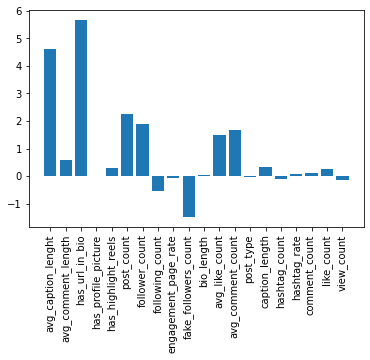


  Fold:  2
Label count train:    Counter({1: 1137, 0: 175}) 	Label count test :  Counter({0: 514, 1: 163})
confution matrix:
[[341   0]
 [173 163]]
Evaluation criteria:
	Accuracy:	 train:   1.0000000 	 test:  0.7444609 
	Precision:	 train:    1.0000000 	 test:  0.8317121 
	Recall: 	 train:    1.0000000 	 test:  0.7425595 
	F1_measure: 	 train:    1.0000000 	 test:  0.7254837
coeficient: 
 [ 4.58808  0.73376  5.61965  0.       0.31017  2.27487  1.84758 -0.5568
 -0.04525 -1.44653  0.0532   1.49311  1.68706 -0.04882  0.39471 -0.12111
  0.05009  0.10887  0.2701  -0.16048]


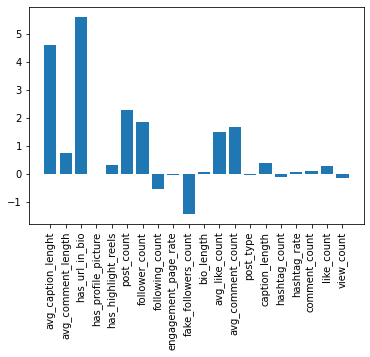


  Fold:  3
Label count train:    Counter({1: 1137, 0: 175}) 	Label count test :  Counter({0: 514, 1: 163})
confution matrix:
[[341   0]
 [173 163]]
Evaluation criteria:
	Accuracy:	 train:   1.0000000 	 test:  0.7444609 
	Precision:	 train:    1.0000000 	 test:  0.8317121 
	Recall: 	 train:    1.0000000 	 test:  0.7425595 
	F1_measure: 	 train:    1.0000000 	 test:  0.7254837
coeficient: 
 [ 4.557    0.65031  5.64014  0.       0.32446  2.23181  1.86904 -0.5796
 -0.03369 -1.52562 -0.02666  1.47756  1.67957 -0.06836  0.29432 -0.09026
  0.14779  0.11015  0.2698  -0.1631 ]


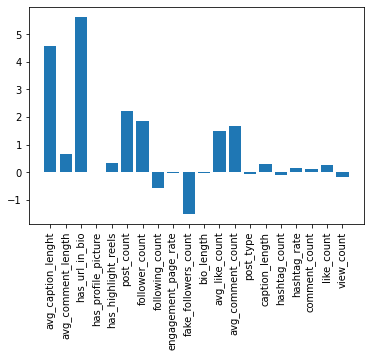


  Fold:  4
Label count train:    Counter({1: 1137, 0: 175}) 	Label count test :  Counter({0: 514, 1: 163})
confution matrix:
[[341   0]
 [173 163]]
Evaluation criteria:
	Accuracy:	 train:   1.0000000 	 test:  0.7444609 
	Precision:	 train:    1.0000000 	 test:  0.8317121 
	Recall: 	 train:    1.0000000 	 test:  0.7425595 
	F1_measure: 	 train:    1.0000000 	 test:  0.7254837
coeficient: 
 [ 4.56612  0.67775  5.69118  0.       0.29443  2.26268  1.84716 -0.55178
 -0.04506 -1.48214  0.07953  1.4995   1.69681 -0.03966  0.24368 -0.06445
  0.08678  0.10244  0.27451 -0.1674 ]


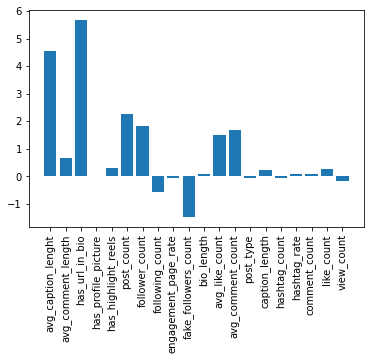


  Fold:  5
Label count train:    Counter({1: 1138, 0: 175}) 	Label count test :  Counter({0: 514, 1: 162})
confution matrix:
[[341   0]
 [173 162]]
Evaluation criteria:
	Accuracy:	 train:   1.0000000 	 test:  0.7440828 
	Precision:	 train:    1.0000000 	 test:  0.8317121 
	Recall: 	 train:    1.0000000 	 test:  0.7417910 
	F1_measure: 	 train:    1.0000000 	 test:  0.7247861
coeficient: 
 [ 4.5267   0.70473  5.68429  0.       0.29507  2.28941  1.90396 -0.56312
 -0.11925 -1.42083  0.14858  1.50171  1.70429 -0.04638  0.33657 -0.11759
  0.18764  0.10062  0.27023 -0.15337]


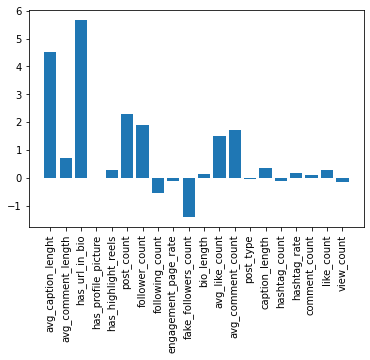


  Fold:  6
Label count train:    Counter({1: 1138, 0: 175}) 	Label count test :  Counter({0: 514, 1: 162})
confution matrix:
[[341   0]
 [173 162]]
Evaluation criteria:
	Accuracy:	 train:   1.0000000 	 test:  0.7440828 
	Precision:	 train:    1.0000000 	 test:  0.8317121 
	Recall: 	 train:    1.0000000 	 test:  0.7417910 
	F1_measure: 	 train:    1.0000000 	 test:  0.7247861
coeficient: 
 [ 4.59214  0.6294   5.67034  0.       0.30207  2.27012  1.90441 -0.57564
 -0.07541 -1.46517  0.09402  1.4897   1.68501 -0.05336  0.32459 -0.10451
  0.06356  0.10523  0.26732 -0.15648]


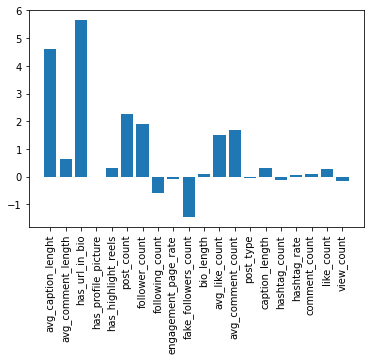


  Fold:  7
Label count train:    Counter({1: 1138, 0: 175}) 	Label count test :  Counter({0: 514, 1: 162})
confution matrix:
[[341   0]
 [173 162]]
Evaluation criteria:
	Accuracy:	 train:   1.0000000 	 test:  0.7440828 
	Precision:	 train:    1.0000000 	 test:  0.8317121 
	Recall: 	 train:    1.0000000 	 test:  0.7417910 
	F1_measure: 	 train:    1.0000000 	 test:  0.7247861
coeficient: 
 [ 4.5683   0.66078  5.63446  0.       0.26968  2.24513  1.88231 -0.54055
 -0.04711 -1.50288  0.01432  1.47727  1.67154 -0.0192   0.28054 -0.21176
  0.14558  0.12228  0.28183 -0.06714]


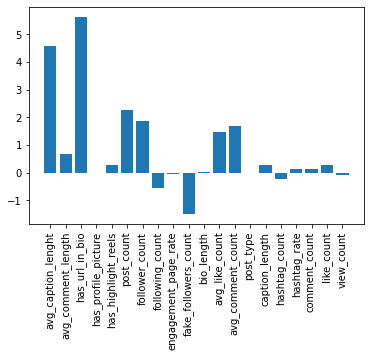


  Fold:  8
Label count train:    Counter({1: 1138, 0: 175}) 	Label count test :  Counter({0: 514, 1: 162})
confution matrix:
[[341   0]
 [173 162]]
Evaluation criteria:
	Accuracy:	 train:   1.0000000 	 test:  0.7440828 
	Precision:	 train:    1.0000000 	 test:  0.8317121 
	Recall: 	 train:    1.0000000 	 test:  0.7417910 
	F1_measure: 	 train:    1.0000000 	 test:  0.7247861
coeficient: 
 [ 4.56682  0.62549  5.68347  0.       0.32223  2.25702  1.8875  -0.57924
 -0.10366 -1.47717  0.0982   1.48704  1.68917 -0.08456  0.24415 -0.14033
  0.04036  0.09503  0.26386 -0.1499 ]


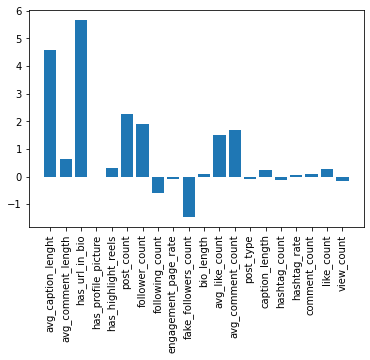


  Mean results: 
	Accuracy_mean:	 train:    1.0000000 	 test:  0.7442718 
	Precision_mean:	 train:    1.0000000 	 test:  0.8317121 
	Recall_mean: 	 train:    1.0000000 	 test:  0.7421753 
	F1_mean: 	 train:    1.0000000 	 test:  0.7251349
  Varance results:
	Accuracy_variance:	 train:    0.0000000 	 test:  0.0000000 
	Precision_variance:	 train: 0.0000000 	 test:  0.0000000 
	Recall_variance: 	 train:   0.0000000 	 test:  0.0000002 
	F1_variance: 		 train:     0.0000000 	 test:  0.0000001


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score,  f1_score
from collections import Counter
import statistics

from numpy.random import seed
seed(3)

# kernel( poly, linear, rbf)

# K_fold = KFold(n_splits=10, shuffle=True, random_state=5,)
K_fold = StratifiedKFold(n_splits=8, shuffle=True, random_state=5,)

i = 1
res = {"accuracy":{"train":[], "test":[]}, 
       "precision":{"train":[], "test":[]}, 
       "recall":{"train":[], "test":[]}, 
       "F1":{"train":[], "test":[]}}

for train_idx, test_idx in K_fold.split(data, label) :
  print("\n  Fold: ", i)
  Train = data[train_idx]
  Train_label = label[train_idx]
  Test = data[test_idx]
  Test_label = label[test_idx]
  Test = np.append(Test, xx, axis=0)
  Test_label = np.append(Test_label, yy)
  
  print("Label count train:   ",Counter(Train_label),"\tLabel count test : ",Counter(Test_label))
  
  clf_o = LogisticRegression(random_state=False, penalty='l2',solver='saga')
  clf_o.fit(Train, Train_label)
  predict_train_label = clf_o.predict(Train)
  predict_test_label = clf_o.predict(Test)
  print('confution matrix:')
  print(metrics.confusion_matrix(predict_test_label, Test_label))
  print('Evaluation criteria:')

  # avg: macro, micro, weighted
  avg = 'macro'
  res['accuracy']['train'].append(accuracy_score(predict_train_label, Train_label))
  res['accuracy']['test'].append(accuracy_score(predict_test_label, Test_label))  
  res['precision']['train'].append(precision_score(predict_train_label, Train_label, average=avg))
  res['precision']['test'].append(precision_score(predict_test_label, Test_label, average=avg))
  res['recall']['train'].append(recall_score(predict_train_label, Train_label, average=avg))
  res['recall']['test'].append(recall_score(predict_test_label, Test_label, average=avg))
  res['F1']['train'].append(f1_score(predict_train_label, Train_label, average=avg))
  res['F1']['test'].append(f1_score(predict_test_label, Test_label, average=avg))

  print("\tAccuracy:\t train:   ",res['accuracy']['train'][i-1],  "\t test: ", res['accuracy']['test'][i-1],
        "\n\tPrecision:\t train:   ", res['precision']['train'][i-1],"\t test: ", res['precision']['test'][i-1],
        "\n\tRecall: \t train:   ", res['recall']['train'][i-1], "\t test: ", res['recall']['test'][i-1],
        "\n\tF1_measure: \t train:   ",  res['F1']['train'][i-1], "\t test: ", res['F1']['test'][i-1],
         )
  
  i+=1

  importance = clf_o.coef_[0]
  print("importance: \n", importance)
  plt.bar([x for x in range(len(importance))], importance)
  plt.xticks([x for x in range(len(importance))], x, rotation=90)
  plt.show()

  del clf_o

# calculate mean and variance for diffrent measures 

print('\n \033[94m Mean results: ')
print("\tAccuracy_mean:\t train:   ",statistics.mean(res['accuracy']['train']),  "\t test: ", statistics.mean(res['accuracy']['test']),
      "\n\tPrecision_mean:\t train:   ", statistics.mean(res['precision']['train']),"\t test: ", statistics.mean(res['precision']['test']),
      "\n\tRecall_mean: \t train:   ", statistics.mean(res['recall']['train']),"\t test: ", statistics.mean(res['recall']['test']),
      "\n\tF1_mean: \t train:   ",  statistics.mean(res['F1']['train']),"\t test: ", statistics.mean(res['F1']['test']),
       )
print(' \033[92m Varance results:')
print("\tAccuracy_variance:\t train:   ",statistics.variance(res['accuracy']['train']),  "\t test: ", statistics.variance(res['accuracy']['test']),
      "\n\tPrecision_variance:\t train:   ", statistics.variance(res['precision']['train']),"\t test: ", statistics.variance(res['precision']['test']),
      "\n\tRecall_variance: \t train:   ", statistics.variance(res['recall']['train']),"\t test: ", statistics.variance(res['recall']['test']),
      "\n\tF1_variance: \t\t train:   ",  statistics.variance(res['F1']['train']),"\t test: ", statistics.variance(res['F1']['test']),
       )

## naive bayes


  Fold:  1
Label count train:    Counter({1: 1114, 0: 171}) 	Label count test :  Counter({0: 518, 1: 186})
confution matrix:
[[446   0]
 [ 72 186]]
Evaluation criteria:
	Accuracy:	 train:    0.9673151750972763 	 test:  0.8977272727272727 
	Precision:	 train:    0.8771929824561404 	 test:  0.9305019305019304 
	Recall: 	 train:    0.9818339100346021 	 test:  0.8604651162790697 
	F1_measure: 	 train:    0.920748898678414 	 test:  0.88157452057867
importance: 
 [ 8.46667e-03  1.45333e-02  3.96000e-02  0.00000e+00  2.40000e-03
  8.13333e-03  8.00000e-03  2.60000e-03  9.40000e-03  2.36000e-02
  1.33333e-04  8.73333e-03  7.46667e-03  3.00000e-03  0.00000e+00
  1.00000e-03  0.00000e+00  2.00000e-04  3.33333e-04 -6.66667e-05]


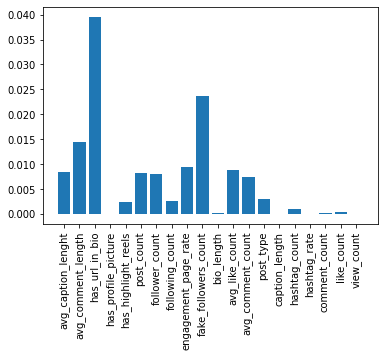


  Fold:  2
Label count train:    Counter({1: 1114, 0: 171}) 	Label count test :  Counter({0: 518, 1: 186})
confution matrix:
[[445   0]
 [ 73 186]]
Evaluation criteria:
	Accuracy:	 train:    0.9680933852140078 	 test:  0.8963068181818182 
	Precision:	 train:    0.8801169590643274 	 test:  0.9295366795366795 
	Recall: 	 train:    0.9822510822510823 	 test:  0.859073359073359 
	F1_measure: 	 train:    0.9228588706075971 	 test:  0.8800751397202096
importance: 
 [ 8.46667e-03  1.45333e-02  4.00667e-02  0.00000e+00  2.40000e-03
  8.13333e-03  8.00000e-03  2.60000e-03  9.40000e-03  2.36000e-02
  1.33333e-04  8.73333e-03  7.46667e-03  3.00000e-03  0.00000e+00
  1.60000e-03  0.00000e+00  2.00000e-04  3.33333e-04 -6.66667e-05]


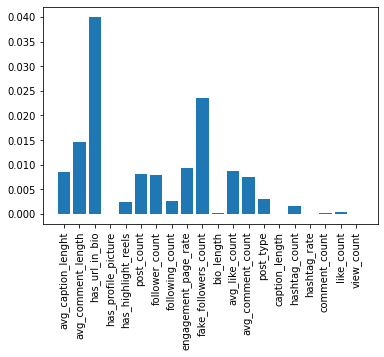


  Fold:  3
Label count train:    Counter({1: 1114, 0: 172}) 	Label count test :  Counter({0: 517, 1: 186})
confution matrix:
[[441   0]
 [ 76 186]]
Evaluation criteria:
	Accuracy:	 train:    0.9704510108864697 	 test:  0.8918918918918919 
	Precision:	 train:    0.8895348837209303 	 test:  0.9264990328820116 
	Recall: 	 train:    0.9835069444444444 	 test:  0.8549618320610687 
	F1_measure: 	 train:    0.9295236776675955 	 test:  0.8755126006561289
importance: 
 [ 8.46667e-03  1.45333e-02  4.09333e-02  0.00000e+00  2.40000e-03
  8.13333e-03  8.00000e-03  2.60000e-03  9.40000e-03  2.29333e-02
  1.33333e-04  8.73333e-03  7.46667e-03  3.00000e-03  0.00000e+00
  1.60000e-03  0.00000e+00  2.00000e-04  3.33333e-04 -6.66667e-05]


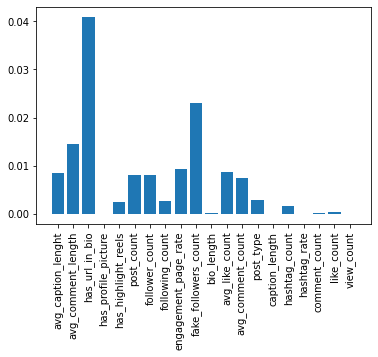


  Fold:  4
Label count train:    Counter({1: 1114, 0: 172}) 	Label count test :  Counter({0: 517, 1: 186})
confution matrix:
[[446   0]
 [ 71 186]]
Evaluation criteria:
	Accuracy:	 train:    0.9681181959564541 	 test:  0.89900426742532 
	Precision:	 train:    0.8808139534883721 	 test:  0.9313346228239845 
	Recall: 	 train:    0.9822510822510823 	 test:  0.8618677042801557 
	F1_measure: 	 train:    0.9233084172233883 	 test:  0.8830005930489042
importance: 
 [ 2.24000e-02  1.54667e-02  4.16667e-02  0.00000e+00  2.40000e-03
  8.46667e-03  8.26667e-03  2.60000e-03  9.86667e-03  2.29333e-02
  2.00000e-04  8.73333e-03  7.73333e-03  3.33333e-03  6.66667e-04
  6.00000e-04  0.00000e+00  2.00000e-04  3.33333e-04 -6.66667e-05]


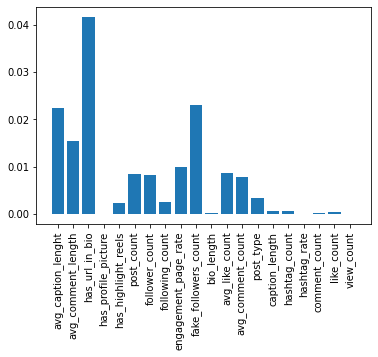


  Fold:  5
Label count train:    Counter({1: 1114, 0: 172}) 	Label count test :  Counter({0: 517, 1: 186})
confution matrix:
[[441   0]
 [ 76 186]]
Evaluation criteria:
	Accuracy:	 train:    0.9673405909797823 	 test:  0.8918918918918919 
	Precision:	 train:    0.877906976744186 	 test:  0.9264990328820116 
	Recall: 	 train:    0.9818339100346021 	 test:  0.8549618320610687 
	F1_measure: 	 train:    0.9212124748373545 	 test:  0.8755126006561289
importance: 
 [ 8.40000e-03  1.40667e-02  3.93333e-02  0.00000e+00  2.33333e-03
  8.00000e-03  7.80000e-03  2.60000e-03  9.00000e-03  2.36000e-02
  0.00000e+00  8.66667e-03  7.46667e-03  2.86667e-03  0.00000e+00
  8.66667e-04  6.66667e-05  2.00000e-04  3.33333e-04 -6.66667e-05]


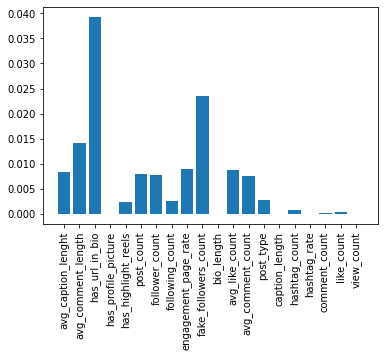


  Fold:  6
Label count train:    Counter({1: 1115, 0: 171}) 	Label count test :  Counter({0: 518, 1: 185})
confution matrix:
[[442   0]
 [ 76 185]]
Evaluation criteria:
	Accuracy:	 train:    0.9681181959564541 	 test:  0.8918918918918919 
	Precision:	 train:    0.8801169590643274 	 test:  0.9266409266409266 
	Recall: 	 train:    0.9822664359861591 	 test:  0.8544061302681992 
	F1_measure: 	 train:    0.9228668272937266 	 test:  0.8752148729446936
importance: 
 [ 2.24667e-02  1.50000e-02  4.12667e-02  0.00000e+00  2.40000e-03
  8.26667e-03  8.06667e-03  2.60000e-03  9.46667e-03  2.36000e-02
  6.66667e-05  8.66667e-03  7.73333e-03  5.66667e-03  6.66667e-04
  1.20000e-03  6.66667e-05  2.00000e-04  3.33333e-04 -6.00000e-04]


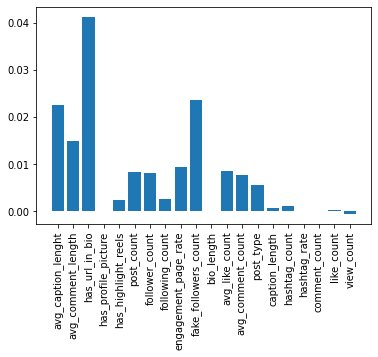


  Fold:  7
Label count train:    Counter({1: 1115, 0: 171}) 	Label count test :  Counter({0: 518, 1: 185})
confution matrix:
[[444   0]
 [ 74 185]]
Evaluation criteria:
	Accuracy:	 train:    0.968895800933126 	 test:  0.8947368421052632 
	Precision:	 train:    0.8830409356725146 	 test:  0.9285714285714286 
	Recall: 	 train:    0.9826839826839826 	 test:  0.8571428571428572 
	F1_measure: 	 train:    0.9249642617498615 	 test:  0.8782051282051282
importance: 
 [ 8.46667e-03  1.45333e-02  3.96000e-02  0.00000e+00  2.40000e-03
  8.13333e-03  8.00000e-03  2.60000e-03  9.40000e-03  2.36000e-02
  1.33333e-04  8.73333e-03  7.46667e-03  5.53333e-03  0.00000e+00
  1.73333e-03  0.00000e+00  2.00000e-04  3.33333e-04 -6.66667e-05]


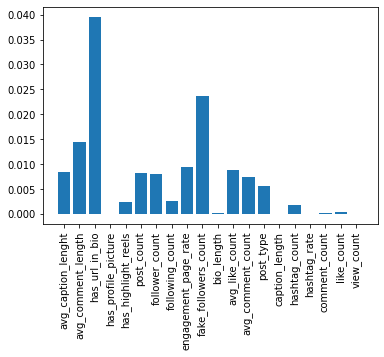


  Mean results: 
	Accuracy_mean:	 train:    0.9683331935747957 	 test:  0.8947786965879071 
	Precision_mean:	 train:    0.8812462357443998 	 test:  0.9285119505484247 
	Recall_mean: 	 train:    0.9823753353837078 	 test:  0.8575541187379683 
	F1_mean: 	 train:    0.9236404897225625 	 test:  0.8784422079728377
  Varance results:
	Accuracy_variance:	 train:    1.1622091231934319e-06 	 test:  8.981230268988687e-06 
	Precision_variance:	 train:    1.7039924264883152e-05 	 test:  4.097585275183994e-06 
	Recall_variance: 	 train:    3.3413696672293823e-07 	 test:  8.817981007769949e-06 
	F1_variance: 		 train:    8.656763660935215e-06 	 test:  1.0148969852384602e-05


In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score,  f1_score
from collections import Counter
import statistics
import sklearn.metrics as metrics

from numpy.random import seed
seed(3)

# kernel( poly, linear, rbf)

# K_fold = KFold(n_splits=10, shuffle=True, random_state=5,)
K_fold = StratifiedKFold(n_splits=7, shuffle=True, random_state=5,)

i = 1
res = {"accuracy":{"train":[], "test":[]}, 
       "precision":{"train":[], "test":[]}, 
       "recall":{"train":[], "test":[]}, 
       "F1":{"train":[], "test":[]}}

for train_idx, test_idx in K_fold.split(data, label) :
  print("\n  Fold: ", i)
  Train = data[train_idx]
  Train_label = label[train_idx]
  Test = data[test_idx]
  Test_label = label[test_idx]
  Test = np.append(Test, xx, axis=0)
  Test_label = np.append(Test_label, yy)
  print("Label count train:   ",Counter(Train_label),"\tLabel count test : ",Counter(Test_label))
  clf_o = BernoulliNB(alpha=0.01, fit_prior=True,binarize=0.55)
  clf_o.fit(Train, Train_label)
  predict_train_label = clf_o.predict(Train)
  predict_test_label = clf_o.predict(Test)
  print('confution matrix:')
  print(metrics.confusion_matrix(predict_test_label, Test_label))
  print('Evaluation criteria:')

  # avg: macro, micro, weighted
  avg = 'macro'
  res['accuracy']['train'].append(accuracy_score(predict_train_label, Train_label))
  res['accuracy']['test'].append(accuracy_score(predict_test_label, Test_label))  
  res['precision']['train'].append(precision_score(predict_train_label, Train_label, average=avg))
  res['precision']['test'].append(precision_score(predict_test_label, Test_label, average=avg))
  res['recall']['train'].append(recall_score(predict_train_label, Train_label, average=avg))
  res['recall']['test'].append(recall_score(predict_test_label, Test_label, average=avg))
  res['F1']['train'].append(f1_score(predict_train_label, Train_label, average=avg))
  res['F1']['test'].append(f1_score(predict_test_label, Test_label, average=avg))

  print("\tAccuracy:\t train:   ",res['accuracy']['train'][i-1],  "\t test: ", res['accuracy']['test'][i-1],
        "\n\tPrecision:\t train:   ", res['precision']['train'][i-1],"\t test: ", res['precision']['test'][i-1],
        "\n\tRecall: \t train:   ", res['recall']['train'][i-1], "\t test: ", res['recall']['test'][i-1],
        "\n\tF1_measure: \t train:   ",  res['F1']['train'][i-1], "\t test: ", res['F1']['test'][i-1],
         )

  i+=1

  im, imp_all = feature_importance_permutation(
    predict_method = clf_o.predict, 
    X=data, y=label,
    metric='accuracy', num_rounds=10, seed=1)
  print("importance: \n", im)
  plt.bar([x for x in range(len(im))], im)
  plt.xticks([x for x in range(len(im))], x, rotation=90)
  plt.show()

  del clf_o

# calculate mean and variance for diffrent measures 

print('\n \033[94m Mean results: ')
print("\tAccuracy_mean:\t train:   ",statistics.mean(res['accuracy']['train']),  "\t test: ", statistics.mean(res['accuracy']['test']),
      "\n\tPrecision_mean:\t train:   ", statistics.mean(res['precision']['train']),"\t test: ", statistics.mean(res['precision']['test']),
      "\n\tRecall_mean: \t train:   ", statistics.mean(res['recall']['train']),"\t test: ", statistics.mean(res['recall']['test']),
      "\n\tF1_mean: \t train:   ",  statistics.mean(res['F1']['train']),"\t test: ", statistics.mean(res['F1']['test']),
       )
print(' \033[92m Varance results:')
print("\tAccuracy_variance:\t train:   ",statistics.variance(res['accuracy']['train']),  "\t test: ", statistics.variance(res['accuracy']['test']),
      "\n\tPrecision_variance:\t train:   ", statistics.variance(res['precision']['train']),"\t test: ", statistics.variance(res['precision']['test']),
      "\n\tRecall_variance: \t train:   ", statistics.variance(res['recall']['train']),"\t test: ", statistics.variance(res['recall']['test']),
      "\n\tF1_variance: \t\t train:   ",  statistics.variance(res['F1']['train']),"\t test: ", statistics.variance(res['F1']['test']),
       )

## random forest


  Fold:  1
Label count train:    Counter({1: 1171, 0: 179}) 	Label count test :  Counter({0: 510, 1: 129})
confution matrix:
[[510   0]
 [  0 129]]
Evaluation criteria:
	Accuracy:	 train:    1.0 	 test:  1.0 
	Precision:	 train:    1.0 	 test:  1.0 
	Recall: 	 train:    1.0 	 test:  1.0 
	F1_measure: 	 train:    1.0 	 test:  1.0
feature_ importance: 
 [1.38457425e-01 9.47077122e-02 1.93714659e-03 0.00000000e+00
 6.48681320e-03 9.68705858e-02 1.48493929e-02 2.73499028e-01
 8.05924590e-02 2.95190534e-02 1.79195628e-01 1.27466898e-02
 6.39732480e-02 0.00000000e+00 0.00000000e+00 6.20907096e-03
 0.00000000e+00 0.00000000e+00 7.34638794e-04 2.21108128e-04]


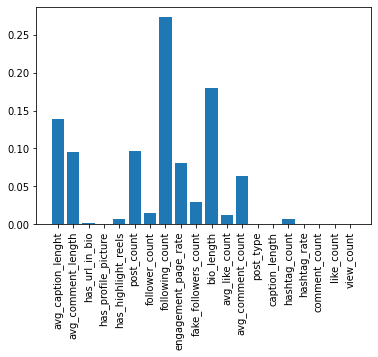


  Fold:  2
Label count train:    Counter({1: 1178, 0: 172}) 	Label count test :  Counter({0: 517, 1: 122})
confution matrix:
[[517   0]
 [  0 122]]
Evaluation criteria:
	Accuracy:	 train:    1.0 	 test:  1.0 
	Precision:	 train:    1.0 	 test:  1.0 
	Recall: 	 train:    1.0 	 test:  1.0 
	F1_measure: 	 train:    1.0 	 test:  1.0
feature_ importance: 
 [0.23564245 0.05681056 0.01203092 0.         0.00107504 0.1225294
 0.01326956 0.20736435 0.08050349 0.06963241 0.13280762 0.01191558
 0.04880301 0.         0.         0.0050335  0.         0.
 0.00258211 0.        ]


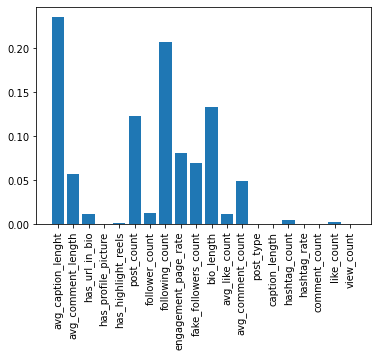


  Fold:  3
Label count train:    Counter({1: 1166, 0: 184}) 	Label count test :  Counter({0: 505, 1: 134})
confution matrix:
[[505   0]
 [  0 134]]
Evaluation criteria:
	Accuracy:	 train:    1.0 	 test:  1.0 
	Precision:	 train:    1.0 	 test:  1.0 
	Recall: 	 train:    1.0 	 test:  1.0 
	F1_measure: 	 train:    1.0 	 test:  1.0
feature_ importance: 
 [1.67194717e-01 6.07743331e-02 2.12234923e-03 0.00000000e+00
 2.20368719e-03 1.11464864e-01 5.52760868e-03 2.40052664e-01
 9.23285117e-02 1.13854134e-01 1.65191415e-01 4.79223240e-03
 2.98018249e-02 0.00000000e+00 0.00000000e+00 4.59801852e-03
 0.00000000e+00 0.00000000e+00 9.36398989e-05 0.00000000e+00]


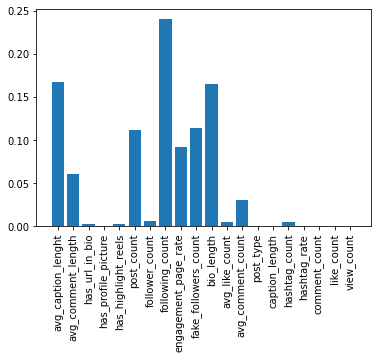


  Fold:  4
Label count train:    Counter({1: 1173, 0: 177}) 	Label count test :  Counter({0: 512, 1: 127})
confution matrix:
[[512   0]
 [  0 127]]
Evaluation criteria:
	Accuracy:	 train:    1.0 	 test:  1.0 
	Precision:	 train:    1.0 	 test:  1.0 
	Recall: 	 train:    1.0 	 test:  1.0 
	F1_measure: 	 train:    1.0 	 test:  1.0
feature_ importance: 
 [1.71286056e-01 7.68132941e-02 1.73892287e-02 0.00000000e+00
 4.67933914e-03 8.71422693e-02 5.70678268e-03 2.62177978e-01
 4.87826963e-02 7.29141112e-02 1.79308053e-01 2.00921947e-02
 4.01019157e-02 1.23852390e-04 0.00000000e+00 1.10226734e-02
 0.00000000e+00 2.99964347e-04 1.88197766e-03 2.77614158e-04]


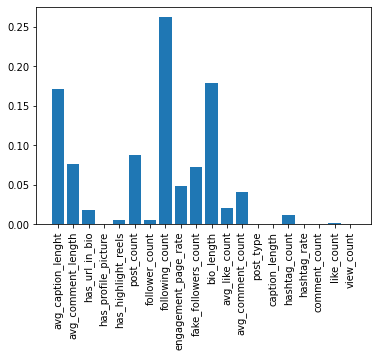


  Fold:  5
Label count train:    Counter({1: 1169, 0: 181}) 	Label count test :  Counter({0: 508, 1: 131})
confution matrix:
[[508   0]
 [  0 131]]
Evaluation criteria:
	Accuracy:	 train:    1.0 	 test:  1.0 
	Precision:	 train:    1.0 	 test:  1.0 
	Recall: 	 train:    1.0 	 test:  1.0 
	F1_measure: 	 train:    1.0 	 test:  1.0
feature_ importance: 
 [2.14037613e-01 6.43716953e-02 2.09935544e-02 0.00000000e+00
 3.08310864e-03 6.68379879e-02 2.57225834e-02 2.67539948e-01
 4.92302135e-02 4.55327799e-02 1.67235181e-01 1.85790911e-02
 4.98278705e-02 8.10222892e-05 1.30505129e-04 5.53578503e-03
 0.00000000e+00 0.00000000e+00 1.26106123e-03 0.00000000e+00]


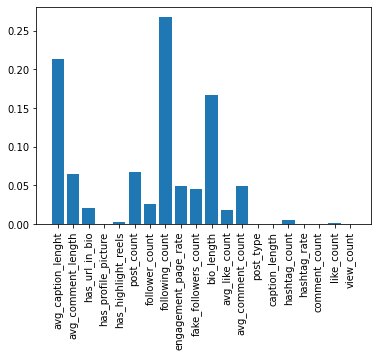


  Fold:  6
Label count train:    Counter({1: 1172, 0: 178}) 	Label count test :  Counter({0: 511, 1: 128})
confution matrix:
[[511   0]
 [  0 128]]
Evaluation criteria:
	Accuracy:	 train:    1.0 	 test:  1.0 
	Precision:	 train:    1.0 	 test:  1.0 
	Recall: 	 train:    1.0 	 test:  1.0 
	F1_measure: 	 train:    1.0 	 test:  1.0
feature_ importance: 
 [2.15663846e-01 9.03369557e-02 1.20637188e-02 0.00000000e+00
 2.66663700e-03 7.06262525e-02 9.16731675e-03 2.94404779e-01
 4.30392304e-02 6.19806478e-02 1.45014913e-01 5.52537349e-03
 3.67024524e-02 0.00000000e+00 9.29421680e-05 1.23635858e-02
 0.00000000e+00 2.13204927e-04 1.38144185e-04 0.00000000e+00]


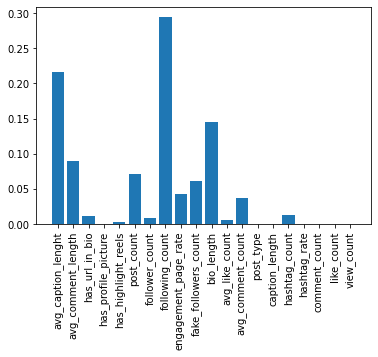


  Fold:  7
Label count train:    Counter({1: 1170, 0: 180}) 	Label count test :  Counter({0: 509, 1: 130})
confution matrix:
[[509   0]
 [  0 130]]
Evaluation criteria:
	Accuracy:	 train:    1.0 	 test:  1.0 
	Precision:	 train:    1.0 	 test:  1.0 
	Recall: 	 train:    1.0 	 test:  1.0 
	F1_measure: 	 train:    1.0 	 test:  1.0
feature_ importance: 
 [1.82542011e-01 7.58893044e-02 1.62016066e-02 0.00000000e+00
 1.88759934e-03 1.13296959e-01 1.06321656e-02 1.96487955e-01
 1.30269058e-01 7.21186795e-02 1.24314219e-01 2.10591707e-02
 4.51190241e-02 7.13478085e-05 4.75247196e-05 6.72710031e-03
 1.95390910e-03 0.00000000e+00 1.23206256e-03 1.50303772e-04]


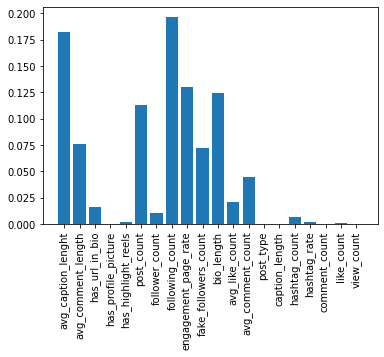


  Fold:  8
Label count train:    Counter({1: 1164, 0: 186}) 	Label count test :  Counter({0: 503, 1: 136})
confution matrix:
[[503   0]
 [  0 136]]
Evaluation criteria:
	Accuracy:	 train:    1.0 	 test:  1.0 
	Precision:	 train:    1.0 	 test:  1.0 
	Recall: 	 train:    1.0 	 test:  1.0 
	F1_measure: 	 train:    1.0 	 test:  1.0
feature_ importance: 
 [2.43943728e-01 5.84614630e-02 2.68463915e-03 0.00000000e+00
 1.73615247e-03 1.03451437e-01 1.66925630e-02 2.37794297e-01
 1.09638152e-01 6.03537207e-02 1.18561500e-01 4.87661885e-03
 4.02105033e-02 0.00000000e+00 0.00000000e+00 1.24151373e-03
 0.00000000e+00 0.00000000e+00 8.42850520e-05 2.69425907e-04]


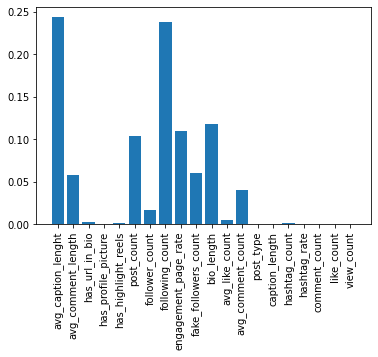


  Fold:  9
Label count train:    Counter({1: 1172, 0: 178}) 	Label count test :  Counter({0: 511, 1: 128})
confution matrix:
[[511   0]
 [  0 128]]
Evaluation criteria:
	Accuracy:	 train:    1.0 	 test:  1.0 
	Precision:	 train:    1.0 	 test:  1.0 
	Recall: 	 train:    1.0 	 test:  1.0 
	F1_measure: 	 train:    1.0 	 test:  1.0
feature_ importance: 
 [0.23637257 0.0595944  0.00640157 0.         0.00175327 0.13795769
 0.00184759 0.18975429 0.05172769 0.07110736 0.18093705 0.01252127
 0.04227424 0.         0.         0.00711329 0.         0.
 0.         0.00063774]


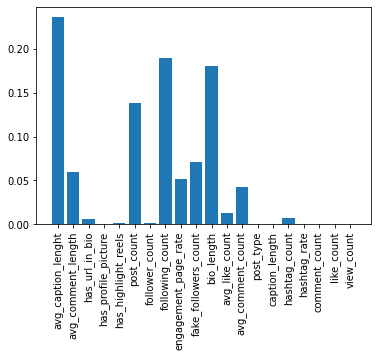


  Fold:  10
Label count train:    Counter({1: 1165, 0: 185}) 	Label count test :  Counter({0: 504, 1: 135})
confution matrix:
[[504   0]
 [  0 135]]
Evaluation criteria:
	Accuracy:	 train:    1.0 	 test:  1.0 
	Precision:	 train:    1.0 	 test:  1.0 
	Recall: 	 train:    1.0 	 test:  1.0 
	F1_measure: 	 train:    1.0 	 test:  1.0
feature_ importance: 
 [2.65588964e-01 7.10833901e-02 8.69346483e-03 0.00000000e+00
 0.00000000e+00 1.19178348e-01 1.96344985e-02 1.81716792e-01
 7.90762268e-02 3.71481861e-02 1.59960332e-01 5.08032776e-03
 4.39615898e-02 0.00000000e+00 0.00000000e+00 2.17454937e-03
 8.38337153e-06 1.89382171e-04 5.99877916e-03 5.06786583e-04]


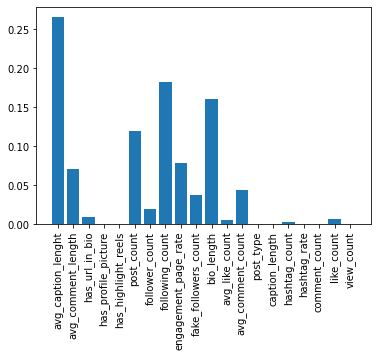


  Mean results: 
	Accuracy_mean:	 train:    1.0 	 test:  1.0 
	Precision_mean:	 train:    1.0 	 test:  1.0 
	Recall_mean: 	 train:    1.0 	 test:  1.0 
	F1_mean: 	 train:    1.0 	 test:  1.0
  Varance results:
	Accuracy_variance:	 train:    0.0 	 test:  0.0 
	Precision_variance:	 train:    0.0 	 test:  0.0 
	Recall_variance: 	 train:    0.0 	 test:  0.0 
	F1_variance: 		 train:    0.0 	 test:  0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score,  f1_score
from collections import Counter
import statistics
import sklearn.metrics as metrics

from numpy.random import seed
seed(3)

# kernel( poly, linear, rbf)

K_fold = KFold(n_splits=10, shuffle=True, random_state=5,)
# K_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=5,)

i = 1
res = {"accuracy":{"train":[], "test":[]}, 
       "precision":{"train":[], "test":[]}, 
       "recall":{"train":[], "test":[]}, 
       "F1":{"train":[], "test":[]}}

for train_idx, test_idx in K_fold.split(data, label) :
  print("\n  Fold: ", i)
  Train = data[train_idx]
  Train_label = label[train_idx]
  Test = data[test_idx]
  Test_label = label[test_idx]
  Test = np.append(Test, xx, axis=0)
  Test_label = np.append(Test_label, yy)
  print("Label count train:   ",Counter(Train_label),"\tLabel count test : ",Counter(Test_label))
  clf_o = RandomForestClassifier()
  clf_o.fit(Train, Train_label)
  predict_train_label = clf_o.predict(Train)
  predict_test_label = clf_o.predict(Test)
  print('confution matrix:')
  print(metrics.confusion_matrix(predict_test_label, Test_label))
  print('Evaluation criteria:')

  # avg: macro, micro, weighted
  avg = 'macro'
  res['accuracy']['train'].append(accuracy_score(predict_train_label, Train_label))
  res['accuracy']['test'].append(accuracy_score(predict_test_label, Test_label))  
  res['precision']['train'].append(precision_score(predict_train_label, Train_label, average=avg))
  res['precision']['test'].append(precision_score(predict_test_label, Test_label, average=avg))
  res['recall']['train'].append(recall_score(predict_train_label, Train_label, average=avg))
  res['recall']['test'].append(recall_score(predict_test_label, Test_label, average=avg))
  res['F1']['train'].append(f1_score(predict_train_label, Train_label, average=avg))
  res['F1']['test'].append(f1_score(predict_test_label, Test_label, average=avg))

  print("\tAccuracy:\t train:   ",res['accuracy']['train'][i-1],  "\t test: ", res['accuracy']['test'][i-1],
        "\n\tPrecision:\t train:   ", res['precision']['train'][i-1],"\t test: ", res['precision']['test'][i-1],
        "\n\tRecall: \t train:   ", res['recall']['train'][i-1], "\t test: ", res['recall']['test'][i-1],
        "\n\tF1_measure: \t train:   ",  res['F1']['train'][i-1], "\t test: ", res['F1']['test'][i-1],
         )
  
  i+=1
  print('feature_ importance: \n', clf_o.feature_importances_)
  importance = clf_o.feature_importances_

  plt.bar([x for x in range(len(importance))], importance)
  plt.xticks([x for x in range(len(importance))], x, rotation=90)
  plt.show()

# calculate mean and variance for diffrent measures 

print('\n \033[94m Mean results: ')
print("\tAccuracy_mean:\t train:   ",statistics.mean(res['accuracy']['train']),  "\t test: ", statistics.mean(res['accuracy']['test']),
      "\n\tPrecision_mean:\t train:   ", statistics.mean(res['precision']['train']),"\t test: ", statistics.mean(res['precision']['test']),
      "\n\tRecall_mean: \t train:   ", statistics.mean(res['recall']['train']),"\t test: ", statistics.mean(res['recall']['test']),
      "\n\tF1_mean: \t train:   ",  statistics.mean(res['F1']['train']),"\t test: ", statistics.mean(res['F1']['test']),
       )
print(' \033[92m Varance results:')
print("\tAccuracy_variance:\t train:   ",statistics.variance(res['accuracy']['train']),  "\t test: ", statistics.variance(res['accuracy']['test']),
      "\n\tPrecision_variance:\t train:   ", statistics.variance(res['precision']['train']),"\t test: ", statistics.variance(res['precision']['test']),
      "\n\tRecall_variance: \t train:   ", statistics.variance(res['recall']['train']),"\t test: ", statistics.variance(res['recall']['test']),
      "\n\tF1_variance: \t\t train:   ",  statistics.variance(res['F1']['train']),"\t test: ", statistics.variance(res['F1']['test']),
       )

## knn


  Fold:  1
Label count train:    Counter({1: 1119, 0: 166}) 	Label count test :  Counter({0: 523, 1: 181})
confution matrix:
[[429   0]
 [ 94 181]]
Evaluation criteria:
	Accuracy:	 train:    1.0 	 test:  0.8664772727272727 
	Precision:	 train:    1.0 	 test:  0.9101338432122371 
	Recall: 	 train:    1.0 	 test:  0.8290909090909091 
	F1_measure: 	 train:    1.0 	 test:  0.8475600766622439
coeficient: 
 [0.01618677 0.         0.22521401 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


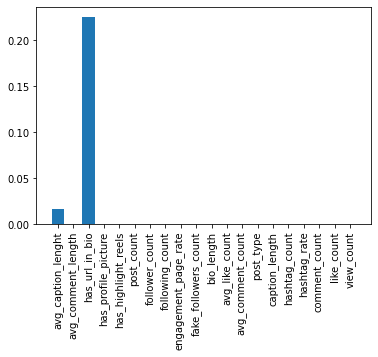


  Fold:  2
Label count train:    Counter({1: 1115, 0: 170}) 	Label count test :  Counter({0: 519, 1: 185})
confution matrix:
[[425   0]
 [ 94 185]]
Evaluation criteria:
	Accuracy:	 train:    1.0 	 test:  0.8664772727272727 
	Precision:	 train:    1.0 	 test:  0.9094412331406552 
	Recall: 	 train:    1.0 	 test:  0.8315412186379929 
	F1_measure: 	 train:    1.0 	 test:  0.8489187609585038
coeficient: 
 [0.01680934 0.         0.26614786 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


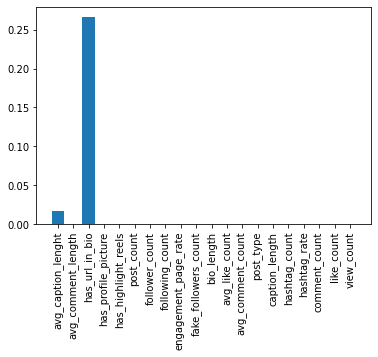


  Fold:  3
Label count train:    Counter({1: 1117, 0: 169}) 	Label count test :  Counter({0: 520, 1: 183})
confution matrix:
[[427   0]
 [ 93 183]]
Evaluation criteria:
	Accuracy:	 train:    1.0 	 test:  0.8677098150782361 
	Precision:	 train:    1.0 	 test:  0.9105769230769231 
	Recall: 	 train:    1.0 	 test:  0.8315217391304348 
	F1_measure: 	 train:    1.0 	 test:  0.8495903817352355
coeficient: 
 [0.01975117 0.         0.23079316 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


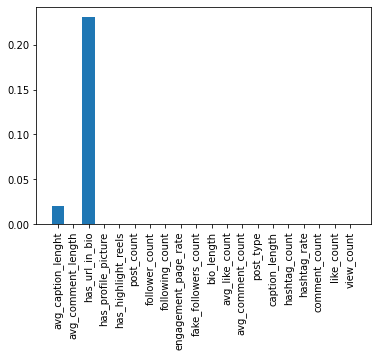


  Fold:  4
Label count train:    Counter({1: 1115, 0: 171}) 	Label count test :  Counter({0: 518, 1: 185})
confution matrix:
[[425   0]
 [ 93 185]]
Evaluation criteria:
	Accuracy:	 train:    1.0 	 test:  0.8677098150782361 
	Precision:	 train:    1.0 	 test:  0.9102316602316602 
	Recall: 	 train:    1.0 	 test:  0.8327338129496402 
	F1_measure: 	 train:    1.0 	 test:  0.850257324058826
coeficient: 
 [0.01508554 0.         0.25178849 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


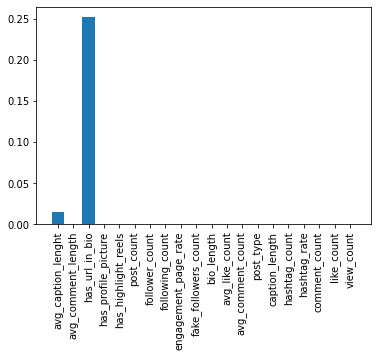


  Fold:  5
Label count train:    Counter({1: 1114, 0: 172}) 	Label count test :  Counter({0: 517, 1: 186})
confution matrix:
[[423   0]
 [ 94 186]]
Evaluation criteria:
	Accuracy:	 train:    1.0 	 test:  0.8662873399715505 
	Precision:	 train:    1.0 	 test:  0.9090909090909092 
	Recall: 	 train:    1.0 	 test:  0.8321428571428571 
	F1_measure: 	 train:    1.0 	 test:  0.8491416309012876
coeficient: 
 [0.01944012 0.         0.22208398 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


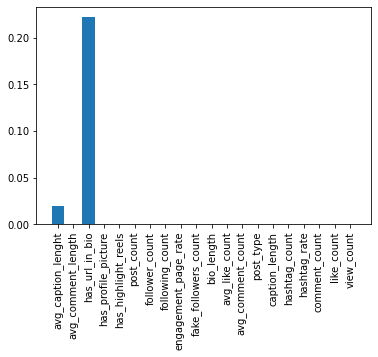


  Fold:  6
Label count train:    Counter({1: 1114, 0: 172}) 	Label count test :  Counter({0: 517, 1: 186})
confution matrix:
[[422   0]
 [ 95 186]]
Evaluation criteria:
	Accuracy:	 train:    1.0 	 test:  0.8648648648648649 
	Precision:	 train:    1.0 	 test:  0.9081237911025145 
	Recall: 	 train:    1.0 	 test:  0.8309608540925266 
	F1_measure: 	 train:    1.0 	 test:  0.8477012084020314
coeficient: 
 [0.0192846  0.         0.22052877 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


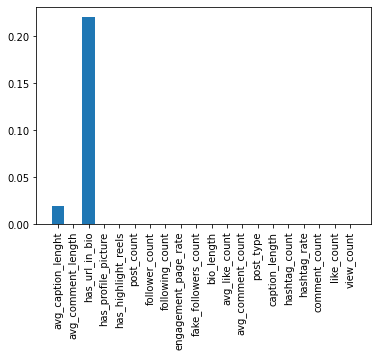


  Fold:  7
Label count train:    Counter({1: 1106, 0: 180}) 	Label count test :  Counter({0: 509, 1: 194})
confution matrix:
[[415   0]
 [ 94 194]]
Evaluation criteria:
	Accuracy:	 train:    1.0 	 test:  0.8662873399715505 
	Precision:	 train:    1.0 	 test:  0.9076620825147348 
	Recall: 	 train:    1.0 	 test:  0.8368055555555556 
	F1_measure: 	 train:    1.0 	 test:  0.8516238256902158
coeficient: 
 [0.01866252 0.         0.25707621 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


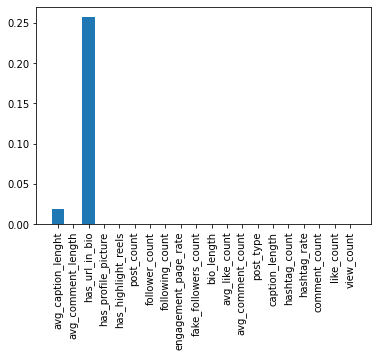


  Mean results: 
	Accuracy_mean:	 train:    1.0 	 test:  0.8665448172027119 
	Precision_mean:	 train:    1.0 	 test:  0.9093229203385191 
	Recall_mean: 	 train:    1.0 	 test:  0.8321138495142738 
	F1_mean: 	 train:    1.0 	 test:  0.8492561726297634
  Varance results:
	Accuracy_variance:	 train:    0.0 	 test:  9.463989198078432e-07 
	Precision_variance:	 train:    0.0 	 test:  1.220007884691708e-06 
	Recall_variance: 	 train:    0.0 	 test:  5.590561625734964e-06 
	F1_variance: 		 train:    0.0 	 test:  2.0235671081317607e-06


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score,  f1_score
from collections import Counter
import statistics
import sklearn.metrics as metrics
from sklearn.inspection import permutation_importance

from numpy.random import seed
seed(3)

# kernel( poly, linear, rbf)

K_fold = KFold(n_splits=7, shuffle=True, random_state=5,)
# K_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=5,)

i = 1
res = {"accuracy":{"train":[], "test":[]}, 
       "precision":{"train":[], "test":[]}, 
       "recall":{"train":[], "test":[]}, 
       "F1":{"train":[], "test":[]}}

for train_idx, test_idx in K_fold.split(data, label) :
  print("\n  Fold: ", i)
  Train = data[train_idx]
  Train_label = label[train_idx]
  Test = data[test_idx]
  Test_label = label[test_idx]
  Test = np.append(Test, xx, axis=0)
  Test_label = np.append(Test_label, yy)
  print("Label count train:   ",Counter(Train_label),"\tLabel count test : ",Counter(Test_label))
  clf_o = KNeighborsClassifier(n_neighbors=15,)
  clf_o.fit(Train, Train_label)
  predict_train_label = clf_o.predict(Train)
  predict_test_label = clf_o.predict(Test)
  print('confution matrix:')
  print(metrics.confusion_matrix(predict_test_label, Test_label))
  print('Evaluation criteria:')

  # avg: macro, micro, weighted
  avg = 'macro'
  res['accuracy']['train'].append(accuracy_score(predict_train_label, Train_label))
  res['accuracy']['test'].append(accuracy_score(predict_test_label, Test_label))  
  res['precision']['train'].append(precision_score(predict_train_label, Train_label, average=avg))
  res['precision']['test'].append(precision_score(predict_test_label, Test_label, average=avg))
  res['recall']['train'].append(recall_score(predict_train_label, Train_label, average=avg))
  res['recall']['test'].append(recall_score(predict_test_label, Test_label, average=avg))
  res['F1']['train'].append(f1_score(predict_train_label, Train_label, average=avg))
  res['F1']['test'].append(f1_score(predict_test_label, Test_label, average=avg))

  print("\tAccuracy:\t train:   ",res['accuracy']['train'][i-1],  "\t test: ", res['accuracy']['test'][i-1],
        "\n\tPrecision:\t train:   ", res['precision']['train'][i-1],"\t test: ", res['precision']['test'][i-1],
        "\n\tRecall: \t train:   ", res['recall']['train'][i-1], "\t test: ", res['recall']['test'][i-1],
        "\n\tF1_measure: \t train:   ",  res['F1']['train'][i-1], "\t test: ", res['F1']['test'][i-1],
         )
  
  i+=1
  
  results = permutation_importance(clf_o, Train, Train_label, scoring='neg_mean_squared_error')
  # get importance
  importance = results.importances_mean
  print("coeficient: \n", importance)
  
  plt.bar([x for x in range(len(importance))], importance)
  plt.xticks([x for x in range(len(importance))], x, rotation=90)
  plt.show()

  
  del clf_o

# calculate mean and variance for diffrent measures 

print('\n \033[94m Mean results: ')
print("\tAccuracy_mean:\t train:   ",statistics.mean(res['accuracy']['train']),  "\t test: ", statistics.mean(res['accuracy']['test']),
      "\n\tPrecision_mean:\t train:   ", statistics.mean(res['precision']['train']),"\t test: ", statistics.mean(res['precision']['test']),
      "\n\tRecall_mean: \t train:   ", statistics.mean(res['recall']['train']),"\t test: ", statistics.mean(res['recall']['test']),
      "\n\tF1_mean: \t train:   ",  statistics.mean(res['F1']['train']),"\t test: ", statistics.mean(res['F1']['test']),
       )
print(' \033[92m Varance results:')
print("\tAccuracy_variance:\t train:   ",statistics.variance(res['accuracy']['train']),  "\t test: ", statistics.variance(res['accuracy']['test']),
      "\n\tPrecision_variance:\t train:   ", statistics.variance(res['precision']['train']),"\t test: ", statistics.variance(res['precision']['test']),
      "\n\tRecall_variance: \t train:   ", statistics.variance(res['recall']['train']),"\t test: ", statistics.variance(res['recall']['test']),
      "\n\tF1_variance: \t\t train:   ",  statistics.variance(res['F1']['train']),"\t test: ", statistics.variance(res['F1']['test']),
       )